In [8]:
import astropy.io.fits as fits
import matplotlib.pylab as plt
import numpy as np
from scipy.signal import medfilt
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
import math
from mpmath import mp
import os
import os.path 
import random
from random import seed
from random import choice
from random import uniform
import mplcursors
import pandas as pd
import glob
%matplotlib inline

In [9]:
directory = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/'

In [14]:
for name in glob.glob('/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/*'):
    print(name)

/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRS_3injections.fits
/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRS_1injection.fits
/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRU_1injection.fits
/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRU_3injections.fits
/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRR_3injections.fits
/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRR_1injection.fits
/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/injections_1order.fits
/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/injections_3orders.fits


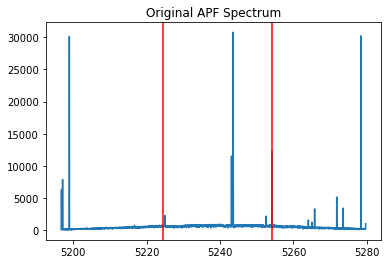

In [239]:
APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl = wl_file[0].data

APF_flux_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/injections_1order.fits'
file = fits.open(APF_flux_path)
flux = file[0].data
plt.plot(wl[35], flux[35][1:])
# plt.plot(wl[34], flux[34][1:])
# plt.plot(wl[36], flux[36][1:])
plt.axvline(wl[35][1300], color='red')
plt.axvline(wl[35][-1700], color='red')
plt.title('Original APF Spectrum')

plt.show()

In [218]:
f = flux[35][:-3000]
ind = f.tolist().index(max(f))
wl[35][ind]

5198.948547094751

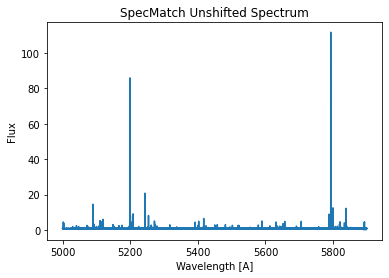

In [227]:
APF_flux_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRU_1injection.fits'
file = fits.open(APF_flux_path)
flux = file[0].data
wl = file[1].data

plt.figure()
plt.plot(wl, flux)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('SpecMatch Unshifted Spectrum')

# plt.xlim(5195, 5290)
# plt.ylim(0, 25)
plt.show()

In [220]:
f = flux[:-10000]
ind = f.tolist().index(max(f))
wl[ind]

5198.940241669217

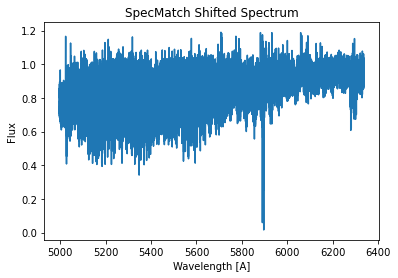

In [221]:
APF_flux_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRS_1injection.fits'
file = fits.open(APF_flux_path)
flux = file[0].data
wl = file[1].data

plt.figure()
plt.plot(wl, flux)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('SpecMatch Shifted Spectrum')

# plt.xlim(5195, 5290)
plt.show()

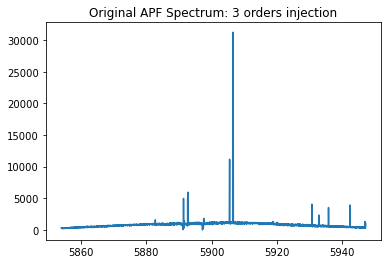

In [224]:
APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl = wl_file[0].data

APF_flux_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/injections_3orders.fits'
file = fits.open(APF_flux_path)
flux = file[0].data

plt.plot(wl[45], flux[45][1:])
plt.title('Original APF Spectrum: 3 orders injection')
plt.show()

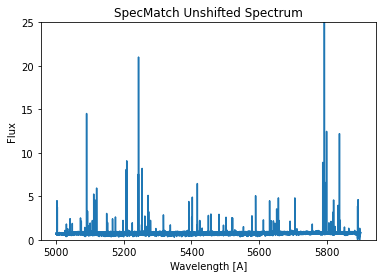

In [226]:
APF_flux_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRU_3injections.fits'
file = fits.open(APF_flux_path)
flux = file[0].data
wl = file[1].data

plt.figure()
plt.plot(wl, flux)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('SpecMatch Unshifted Spectrum')
# plt.xlim(5860, 5940)
plt.ylim(0, 25)
plt.show()

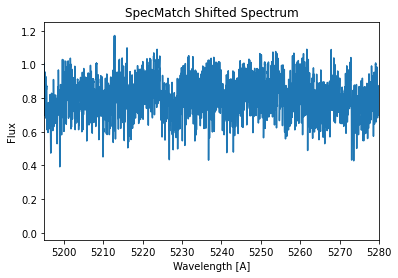

In [170]:
APF_flux_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/CalcRV/TestFiles/KIC8462852_NDRS_3injections.fits'
file = fits.open(APF_flux_path)
flux = file[0].data
wl = file[1].data

plt.figure()
plt.plot(wl, flux)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('SpecMatch Shifted Spectrum')

plt.xlim(5195, 5280)
plt.show()